# Stock Price Prediction Utilizing LSTM Techniques
&emsp;&emsp;A stock price prediction project using Long Short-Term Memory model. 

## Import Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

## Access Data
&emsp;&emsp;Enter the stock ticker, date, and the epoch times. Noted that the first 80% of the date will be used for training, and the remaining 20% will be used for validation.

&emsp;&emsp;Example Inputs："AAPL" for Apple Stocks, "2005-01-01", "2023-09-10"

In [2]:
Company = input("Ticker of the Stock:")
Date1 = input("Start(YYYY-MM-DD):")
Date2 = input("End(YYYY-MM-DD):")

Ticker of the Stock:AAPL
Start(YYYY-MM-DD):2005-01-01
End(YYYY-MM-DD):2023-09-10


## Data Exploration

In [3]:
Data = yf.download(Company,Date1, Date2)
Data =Data.reset_index()
Data

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.959292,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.969144,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.977632,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.978390,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.049628,2227450400
...,...,...,...,...,...,...,...
4698,2023-09-01,189.490005,189.919998,188.279999,189.460007,189.460007,45732600
4699,2023-09-05,188.279999,189.979996,187.610001,189.699997,189.699997,45280000
4700,2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800
4701,2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703 entries, 0 to 4702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4703 non-null   datetime64[ns]
 1   Open       4703 non-null   float64       
 2   High       4703 non-null   float64       
 3   Low        4703 non-null   float64       
 4   Close      4703 non-null   float64       
 5   Adj Close  4703 non-null   float64       
 6   Volume     4703 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 257.3 KB


In [5]:
Data.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Visualization

### Stock Price

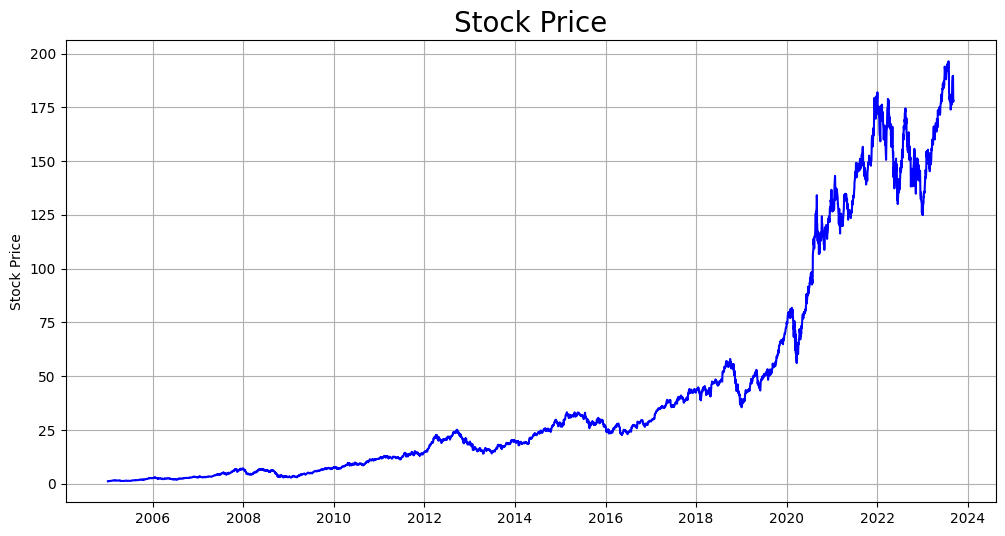

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Stock Price", fontsize="20")
ax.plot(Data["Date"], Data["Close"], color="Blue")
ax.set_ylabel("Stock Price")
plt.grid()
plt.show()

### Moving Average


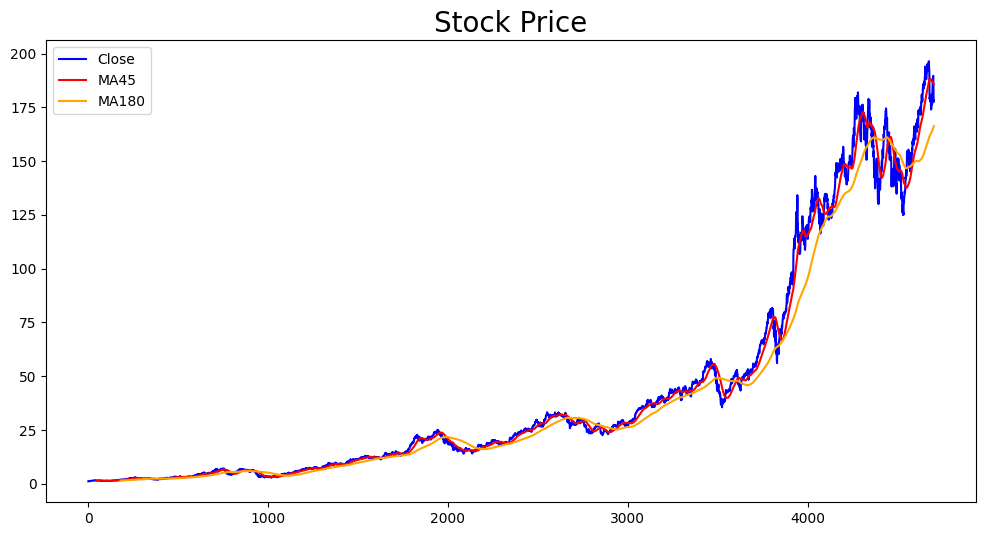

In [7]:
MA45=Data.Close.rolling(45).mean()
MA180=Data.Close.rolling(180).mean()
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Stock Price",fontsize= 20)
plt.plot(Data.Close, color="Blue", label="Close")
plt.plot(MA45, color = 'Red', label = "MA45")
plt.plot(MA180, color = 'Orange', label = "MA180")
plt.legend()

### Volume

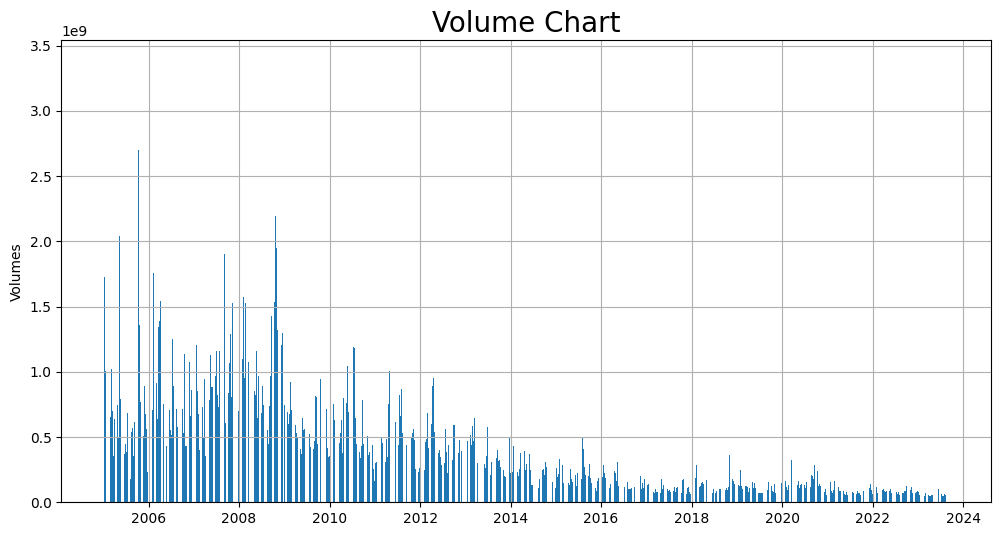

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Volume Chart", fontsize="20")
ax.bar(Data["Date"], Data["Volume"])
ax.set_ylabel("Volumes")
plt.grid()
plt.show()

### Daily Return

In [9]:
Data["Daily Return"] = Data["Close"].pct_change(1)
Data["Daily Return"]

0            NaN
1       0.010270
2       0.008758
3       0.000775
4       0.072811
          ...   
4698    0.008463
4699    0.001267
4700   -0.035793
4701   -0.029249
4702    0.003492
Name: Daily Return, Length: 4703, dtype: float64

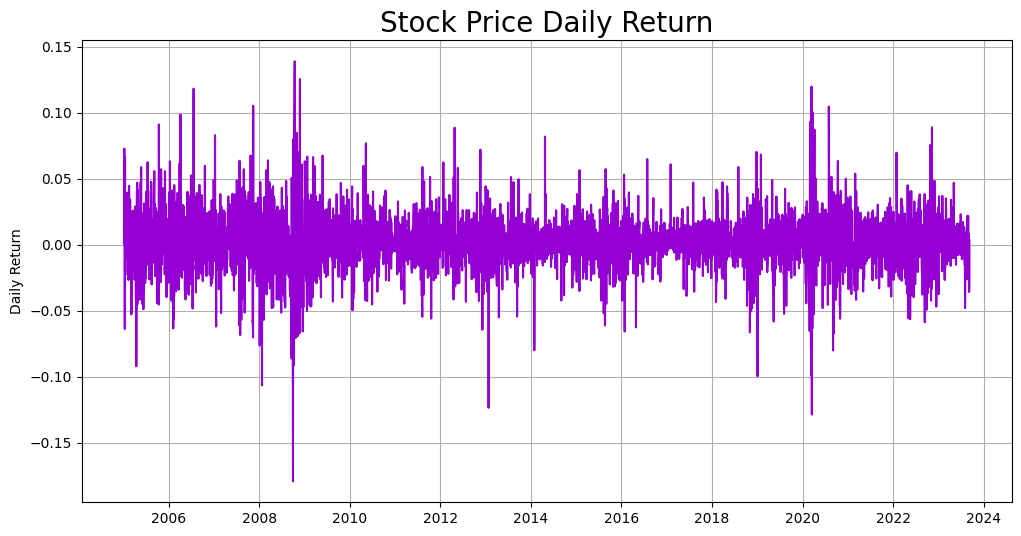

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
plt.title("Stock Price Daily Return",fontsize="20")
ax.plot(Data["Date"], Data["Daily Return"], color="Darkviolet")
ax.set_ylabel("Daily Return")
plt.grid()
plt.show()

<AxesSubplot: >

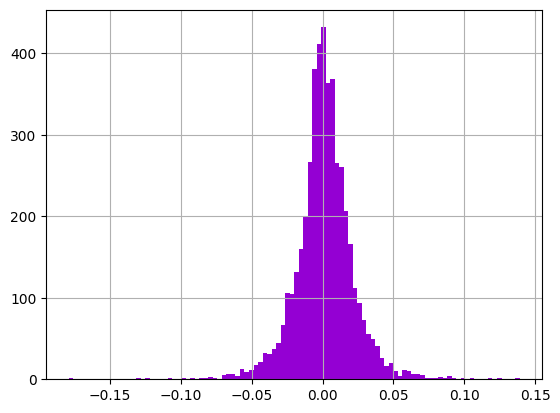

In [11]:
#Distribution of Daily Return(Volatility)
Data.iloc[Data["Daily Return"].argmax()]
Data["Daily Return"].hist(bins=100, color='Darkviolet')

### Cumulative Return

In [12]:
Data["Cumulative Return"] = (1+Data["Daily Return"]).cumprod() 
Data["Cumulative Return"]

0              NaN
1         1.010270
2         1.019118
3         1.019908
4         1.094169
           ...    
4698    167.637161
4699    167.849508
4700    161.841616
4701    157.107848
4702    157.656429
Name: Cumulative Return, Length: 4703, dtype: float64

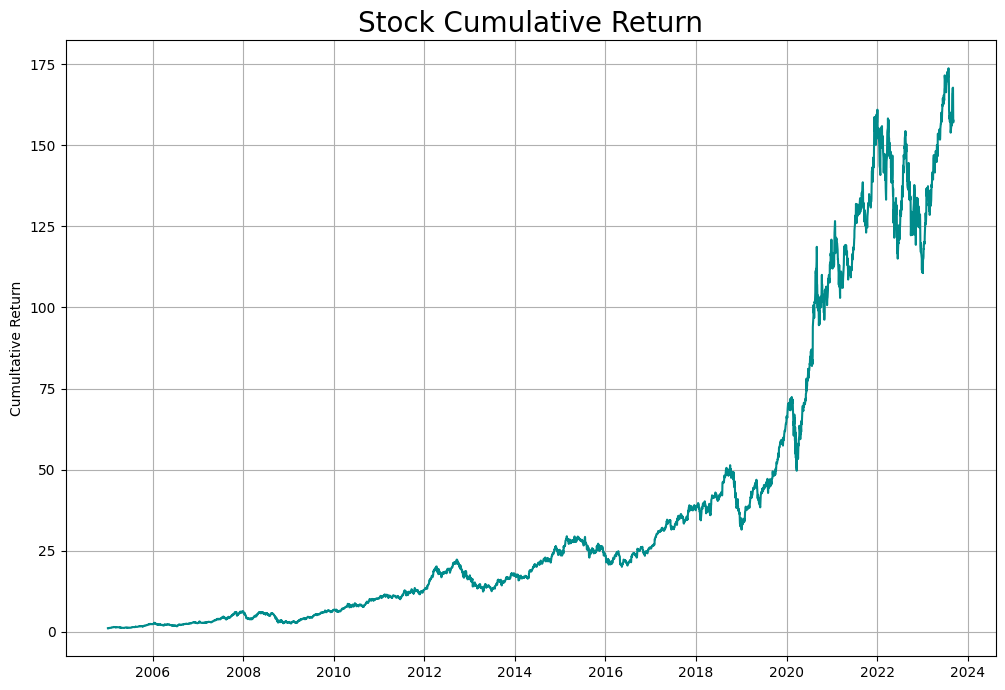

In [13]:
#Cumulative Return of the stock during the given period
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Stock Cumulative Return",fontsize="20")
ax.plot(Data["Date"], Data["Cumulative Return"], color="Darkcyan")
ax.set_ylabel("Cumultative Return")
plt.grid()
plt.show()

## Data Preprocessing

### Splitting Data into Training and Validation Sets

In [14]:
Data['Date'] = pd.to_datetime(Data['Date'])
Data.set_index('Date',inplace=True)
Close = Data.filter(['Close'])
CloseValue = Close.values
TrainingDataLength = math.ceil(len(CloseValue)*.8)
TrainingDataLength

3763

###  Scaling Data

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
PriceData = scaler.fit_transform(CloseValue)
PriceData
## Customized the function: 
# def Rank(data):
#     feature_range = data.max() - data.min()
#     scaled_data = (data - data.min()) / feature_range
#     return scaled_data
# PriceData = Rank(CloseValue)
# Rank(CloseValue)

array([[0.00000000e+00],
       [5.94252637e-05],
       [1.10623297e-04],
       ...,
       [9.30677832e-01],
       [9.03286827e-01],
       [9.06461083e-01]])

### Creating Sequences

In [16]:
X_train, Y_train = [],[]
Backcandles = 45
TrainData = PriceData[0:TrainingDataLength] 
for i in range(Backcandles,len(TrainData)):
    X_train.append(TrainData[i-Backcandles:i, 0])
    Y_train.append(TrainData[i,0])
    if i<= Backcandles:
        print("X_train:",X_train,"\nY_train:",Y_train)
X_train,Y_train = np.array(X_train), np.array(Y_train)

X_train: [array([0.00000000e+00, 5.94252637e-05, 1.10623297e-04, 1.15195269e-04,
       5.44890473e-04, 5.18380236e-04, 1.16106490e-04, 1.98392225e-04,
       5.95177285e-04, 6.31743298e-04, 6.72886165e-04, 6.02488413e-04,
       6.55514380e-04, 6.58258418e-04, 6.82941331e-04, 8.00881248e-04,
       8.19169137e-04, 8.54823318e-04, 9.77330325e-04, 1.24429237e-03,
       1.30189031e-03, 1.49388324e-03, 1.32748932e-03, 1.42165755e-03,
       1.43080210e-03, 1.60999522e-03, 1.41251360e-03, 1.37777614e-03,
       1.63833827e-03, 1.95101027e-03, 2.29659730e-03, 2.45384727e-03,
       2.24174340e-03, 2.15031921e-03, 2.01135225e-03, 2.28014223e-03,
       2.34413947e-03, 2.34962327e-03, 2.41636515e-03, 2.35053937e-03,
       2.28105345e-03, 1.85501350e-03, 2.04152324e-03, 2.03055136e-03,
       1.62462236e-03])] 
Y_train: [0.0014088583461991586]


In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train.shape

(3718, 45, 1)

## LSTM Model Building, Compiling, and Training

In [18]:
Model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    (Dropout(0.2)),
    LSTM((50)),
    (Dropout(0.2)),
    (Dense(32)),
    (Dense(1))
])

Model.compile(optimizer="adam", loss="mean_squared_error") 
Model.fit(X_train, Y_train, batch_size=32, epochs=10)
Model.summary()

Epoch 1/10
117/117 [==============================] - 21s 92ms/step - loss: 8.0464e-04
Epoch 2/10
117/117 [==============================] - 11s 92ms/step - loss: 1.1833e-04
Epoch 3/10
117/117 [==============================] - 11s 92ms/step - loss: 8.7840e-05
Epoch 4/10
117/117 [==============================] - 11s 92ms/step - loss: 9.3212e-05
Epoch 5/10
117/117 [==============================] - 11s 93ms/step - loss: 7.2620e-05
Epoch 6/10
117/117 [==============================] - 11s 93ms/step - loss: 7.3577e-05
Epoch 7/10
117/117 [==============================] - 11s 92ms/step - loss: 7.8143e-05
Epoch 8/10
117/117 [==============================] - 11s 92ms/step - loss: 7.7771e-05
Epoch 9/10
117/117 [==============================] - 11s 93ms/step - loss: 7.6069e-05
Epoch 10/10
117/117 [==============================] - 11s 93ms/step - loss: 7.8948e-05
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape  

In [19]:
test_data= PriceData[TrainingDataLength-Backcandles:, :]
x_test, y_test = [], CloseValue[TrainingDataLength:,:]
for i in range(Backcandles,len(test_data)):
    x_test.append(test_data[i-Backcandles:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(940, 45, 1)

## Results of the Prediction

### Root-Mean-Square Error
&emsp;&emsp;A higher RMSE value generally indicates poorer predictive performance. Hence, our training objective is to "minimize RMSE".

In [20]:
Pred = Model.predict(x_test) 
Pred = scaler.inverse_transform(Pred)
RMSE = np.sqrt(np.mean(Pred - y_test)**2)
RMSE


30/30 [==============================] - 3s 38ms/step


3.7385880652894365

### Prediction Results

In [21]:
TrainingSet,ValidationSet = Close[:TrainingDataLength],Close[TrainingDataLength:]
ValidationSet["Predictions"] = Pred
ValidationSet


,Close,Predictions
Date,,
2019-12-13,68.787498,67.112419
2019-12-16,69.964996,67.387146
2019-12-17,70.102501,67.773087
2019-12-18,69.934998,68.208817
2019-12-19,70.004997,68.629936
...,...,...
2023-09-01,189.460007,174.192093
2023-09-05,189.699997,175.676285
2023-09-06,182.910004,177.135559


### Visualization

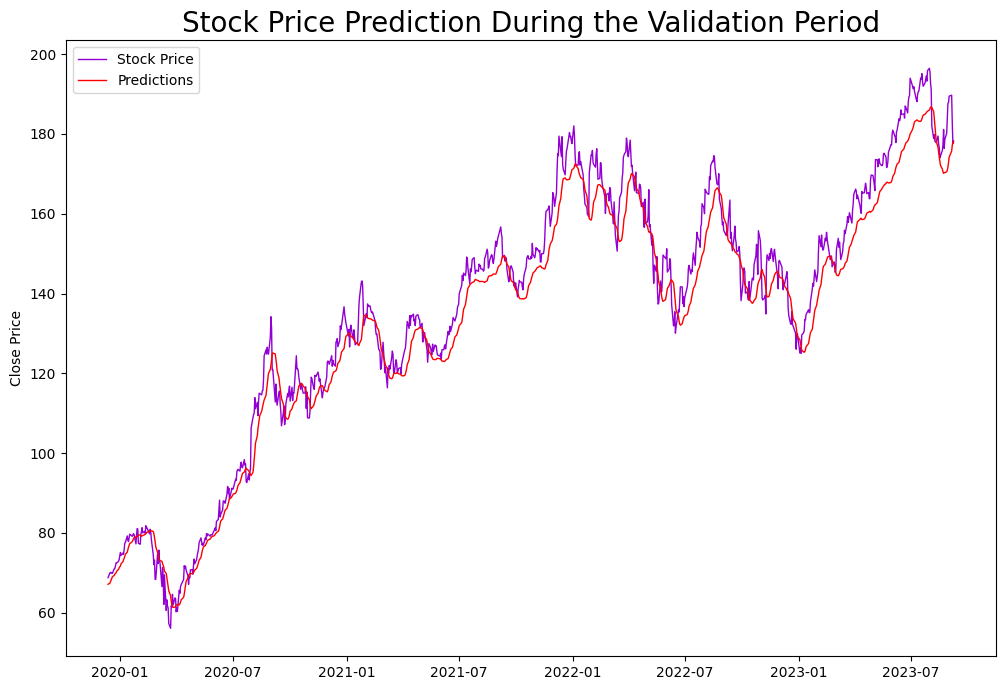

In [22]:
plt.figure(figsize=(12,8))
plt.title("Stock Price Prediction During the Validation Period", fontsize = 20)
plt.ylabel("Close Price")
plt.plot(ValidationSet["Close"],linewidth=1,color = "Darkviolet")
plt.plot(ValidationSet["Predictions"],linewidth=1,color = "Red")
plt.legend(["Stock Price","Predictions"])

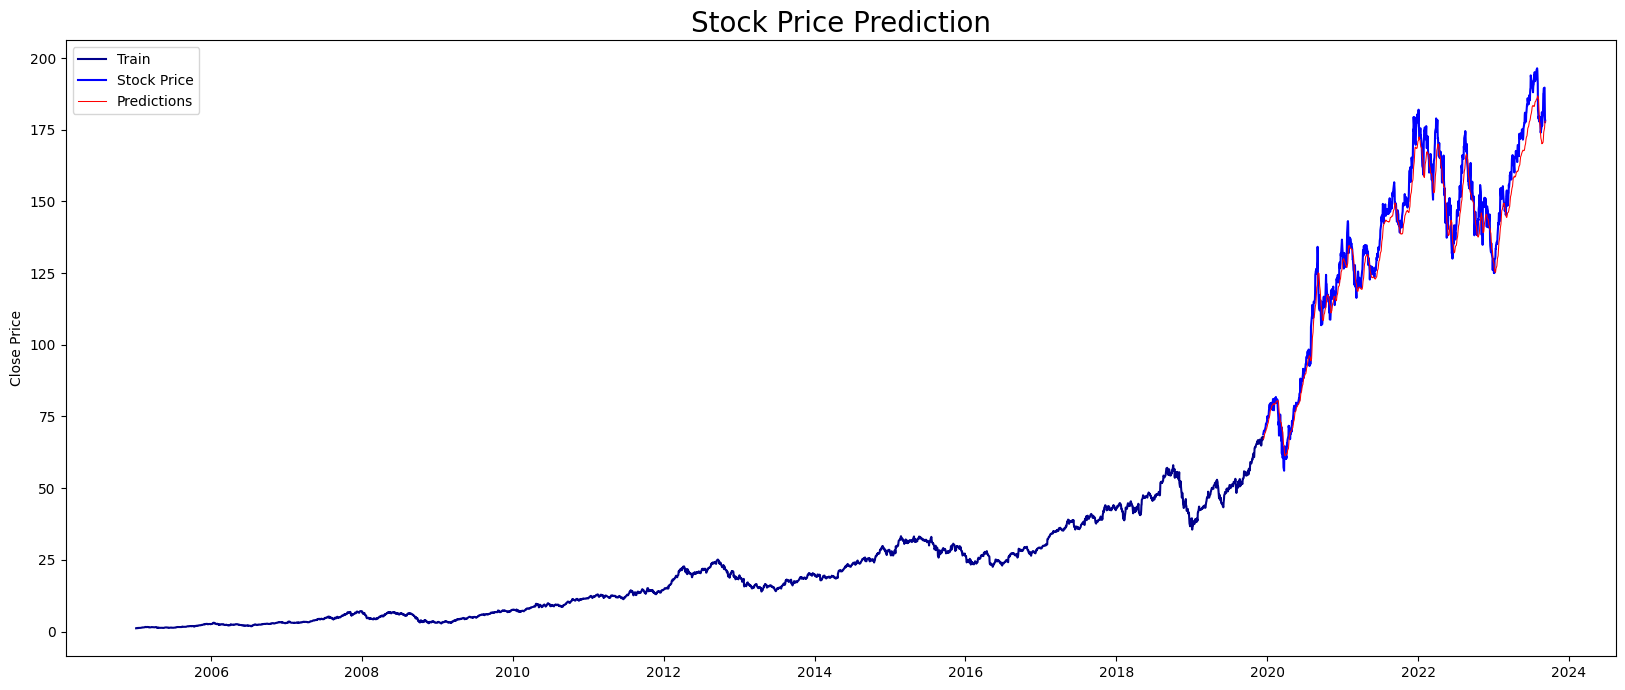

In [23]:
plt.figure(figsize=(20,8))
plt.title("Stock Price Prediction", fontsize=20)
plt.ylabel("Close Price" )
plt.plot(TrainingSet["Close"], color = "Darkblue")
plt.plot(ValidationSet["Close"],color = "Blue")
plt.plot(ValidationSet["Predictions"],linewidth=0.75,color = "Red")
plt.legend(["Train","Stock Price","Predictions"])